<a href="https://colab.research.google.com/github/anandkiit/Diabetes-prediction-model/blob/main/proj_Diabe_RF_SVM_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# loading the diabetes dataset to a pandas Dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [24]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [26]:
# gettinng the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [28]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [29]:
# Splitting the data and labels
x = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [30]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [31]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [32]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

x = standardized_data
y = diabetes_dataset['Outcome']

print("Standardized data:\n", x)
print("Labels:\n", y)

Standardized data:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
Labels:
 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [33]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

print("Shape of full dataset:", x.shape)
print("Shape of training dataset:", x_train.shape)
print("Shape of testing dataset:", x_test.shape)

Shape of full dataset: (768, 8)
Shape of training dataset: (614, 8)
Shape of testing dataset: (154, 8)


In [34]:
# ---------------------- SVM Classifier ----------------------
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

svm_train_pred = svm_classifier.predict(x_train)
svm_test_pred = svm_classifier.predict(x_test)

svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print('\nSVM Training Accuracy:', svm_train_acc)
print('SVM Testing Accuracy:', svm_test_acc)


SVM Training Accuracy: 0.7866449511400652
SVM Testing Accuracy: 0.7727272727272727


In [35]:
# ---------------------- Random Forest Classifier ----------------------
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(x_train, y_train)

rf_train_pred = rf_classifier.predict(x_train)
rf_test_pred = rf_classifier.predict(x_test)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print('\nRandom Forest Training Accuracy:', rf_train_acc)
print('Random Forest Testing Accuracy:', rf_test_acc)


Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.7272727272727273


In [36]:
# ---------------------- Logistic Regression ----------------------
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(x_train, y_train)

logreg_train_pred = logreg_classifier.predict(x_train)
logreg_test_pred = logreg_classifier.predict(x_test)

logreg_train_acc = accuracy_score(y_train, logreg_train_pred)
logreg_test_acc = accuracy_score(y_test, logreg_test_pred)

print('\nLogistic Regression Training Accuracy:', logreg_train_acc)
print('Logistic Regression Testing Accuracy:', logreg_test_acc)



Logistic Regression Training Accuracy: 0.7850162866449512
Logistic Regression Testing Accuracy: 0.7597402597402597


In [37]:
# ---------------------- Model Comparison Summary ----------------------
print("\n--------- Model Comparison Summary (Accuracy Only) ---------")
print("Model                Train Accuracy  Test Accuracy")
print(f"SVM                {svm_train_acc:.4f}       {svm_test_acc:.4f}")
print(f"Random Forest      {rf_train_acc:.4f}       {rf_test_acc:.4f}")
print(f"Logistic Regression{logreg_train_acc:.4f}       {logreg_test_acc:.4f}")



--------- Model Comparison Summary (Accuracy Only) ---------
Model                Train Accuracy  Test Accuracy
SVM                0.7866       0.7727
Random Forest      1.0000       0.7273
Logistic Regression0.7850       0.7597


In [40]:
# ---------------------- Prediction on Custom Input ----------------------
input_data = (4,110,92,0,0,37.6,0.191,30)

# Get feature names
feature_names = diabetes_dataset.drop(columns='Outcome').columns

# Create DataFrame from input with proper feature names
input_df = pd.DataFrame([input_data], columns=feature_names)

# Standardize input
std_data = scaler.transform(input_df)
print("\nStandardized input data:\n", std_data)
print(prediction)


for model, name in zip([svm_classifier, rf_classifier, logreg_classifier],
                       ["SVM", "Random Forest", "Logistic Regression"]):
    prediction = model.predict(std_data)
    result = 'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'
    print(f"{name} Prediction: {result}")



Standardized input data:
 [[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
SVM Prediction: Non-Diabetic
Random Forest Prediction: Non-Diabetic
Logistic Regression Prediction: Non-Diabetic


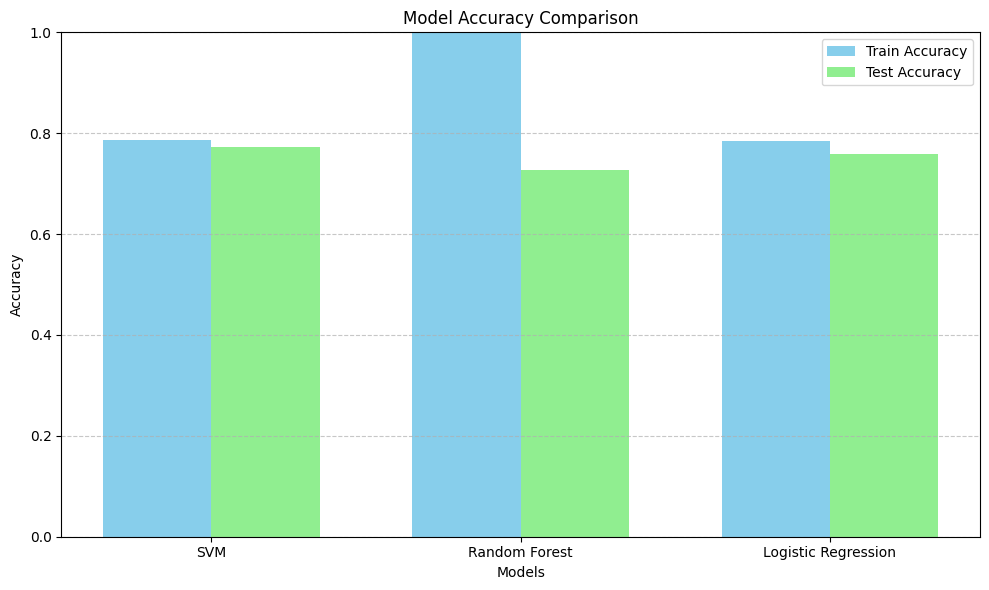

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['SVM', 'Random Forest', 'Logistic Regression']

# Replace these with your actual accuracy scores
train_accuracies = [svm_train_acc, rf_train_acc, logreg_train_acc]
test_accuracies = [svm_test_acc, rf_test_acc, logreg_test_acc]

# Bar positions
x = np.arange(len(models))
bar_width = 0.35

# Plotting
plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, train_accuracies, width=bar_width, label='Train Accuracy', color='skyblue')
plt.bar(x + bar_width/2, test_accuracies, width=bar_width, label='Test Accuracy', color='lightgreen')

# Labels and Title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
